## Деревья решений

**Граф** — это абстрактная топологическая модель, которая состоит из вершин и соединяющих их рёбер.

**Связный граф** — это граф, в котором между любой парой существует направленная связь.

**Ациклический граф** — это граф, в котором отсутствуют циклы, то есть в графе не существует такого пути, по которому можно вернуться в начальную вершину.

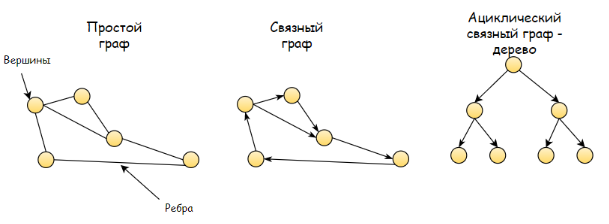

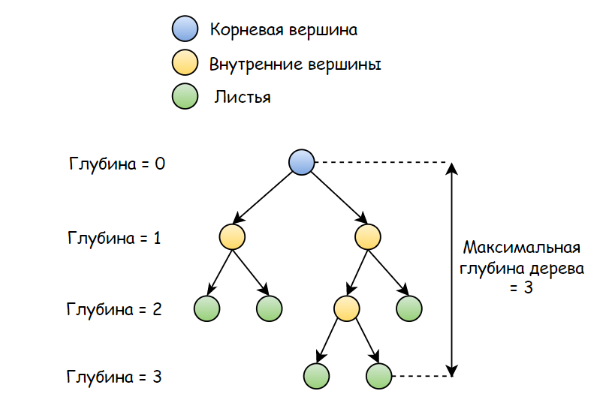

* **Корневая вершина (root node)** — то, откуда всё начинается. Это первый и самый главный вопрос, который дерево задаёт объекту. В примере со страхованием это был вопрос «Возраст автовладельца > 40»;
* **Внутренние вершины (intermediate nodes)**— это дополнительные уточняющие вопросы, которые дерево задаёт объекту; 
* **Листья (leafs)** — конечные вершины дерева. Это вершины, в которых содержится конечный «ответ» — класс объекта.

Логический критерий, который находится в каждой вершине, называется **предикатом**, или **решающим правилом**.
Предикаты — это просто взятие порога по значению какого-то признака:

$$
\begin{aligned}
B_v(x,t) = I[x_j <= t]
\end{aligned}
$$

Предикат вершины дерева  $B_v$ (где $v$  — это номер вершины) равен 1 («Да»), если признак $x_j$ меньше либо равен значению $t$, и 0 («Нет») — в противном случае. Функция $I$ с квадратными скобками — это уже знакомая нам индикаторная функция: она равна 1, если условие внутри скобок выполняется, и 0 — в противном случае.

Существует множество стратегий построения деревьев решений. Например, CART (Classification and Regression Tree), который предназначен для построения бинарных деревьев решений (деревьев, у которых каждая вершина связана с двумя другими вершинами нижнего уровня). Данный алгоритм, как следует из его названия, предназначен для решения задач классификации и регрессии.

Построение дерева решений можно описать рекурсией. Каждая вершина дерева порождает две других вершины, а они в свою очередь порождают новые вершины, и так происходит до тех пор, пока не выполнится некоторый критерий остановки, например в вершине не останутся только наблюдения определённого класса.

### Поиск параметров дерева решений

В линейных моделях мы пытались найти такие коэффициенты в уравнениях, при которых наблюдался минимум функции потерь.

В деревьях же мы пытаемся выбрать такие признаки $x_j$ и их пороговые значения $t$, при которых произойдёт разделение набора на две части по какому-то критерию наилучшим образом.

Мы можем полным перебором найти такую комбинацию $j$ и $t$, которая обеспечит наилучшее уменьшение неопределённости.

Неопределённость можно измерять различными способами, в деревьях решений для этого используются **энтропия Шеннона** и **критерий Джини**.

Пусть в вершину $B_v$ попало множество $X_v$ и $y_v$ объектов из обучающей выборки размером $n_v$, где $n$ — количество наблюдений, а $v$ — номер вершины.

Параметры в условии $[x_j <= t]$ будут выбраны так, чтобы минимизировать некоторую функцию ошибки $L(j,t)$, зависящую от этих параметров: $L(j,t) -> min_{j,t}$, где $j$ — номер признака, а $t$ — пороговое значение.

Параметры $j$ и $t$ мы выбираем простым перебором всех возможных значений. Действительно, признаков — конечное число, а из всех возможных значений порога $t$ можно рассматривать только те, при которых получаются различные разбиения. 

После того как параметры были выбраны, множества $X_V$ объектов из обучающей выборки и ответов к ним $y_v$ разбиваются на два:  $Q_{left} = (X_{left}, y_{left})$ и $Q_{right} = (X_{right}, y_{right})$, для которых условие $[x_j <= t]$ выполняется и не выполняется соответственно.

Каждая из полученных выборок будет иметь свои размеры, назовём их $n_v^{left}$ и $n_v^{right}$. Тогда функция ошибки, численно выражающая неопределённость, будет состоять из двух слагаемых (неопределённость для левой и правой вершин) и определяться следующим образом:
$$
\begin{aligned}
L(j,t) = \cfrac{n_v^{left}}{n_v} H(Q_{left}) + \cfrac{n_v^{right}}{n_v} H(Q_{right})
\end{aligned}
$$

где $H$ — это функция, которая называется **критерием информативности**. Её значение уменьшается с уменьшением разброса ответов на выборке.

КРИТЕРИИ ИНФОРМАТИВНОСТИ:
* **Энтропия Шеннона**:
$$
\begin{aligned}
H(Q) = -\sum_{i=1}^kP_i log_2P_i
\end{aligned}
$$

где $k$ — количество классов, $P_i$ — вероятность принадлежности объекта к классу $i$.

**Энтропия** — интуитивно энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система, и наоборот.

* **Критерий Джини**:
$$
\begin{aligned}
H(Q) = -\sum_{i=1}^kP_i(1-P_i)
\end{aligned}
$$

где $k$ — количество классов, $P_i$ — вероятность принадлежности объекта к $i$-му классу.

Все слагаемые в сумме неотрицательные, поэтому критерий Джини также неотрицателен. Его минимум достигается только в том случае, когда все объекты в выборке относятся к одному классу.

### Пример поиска параметров

В качестве примера рассмотрим задачу сортировки шариков на две группы — жёлтого и синего цвета. В качестве критерия информативности возьмём энтропию. 

Есть всего один признак $x$ — координата шарика (от 0 до 19), то есть $m=1$. Классов у нас два — синие и жёлтые шарики, то есть $k=2$.

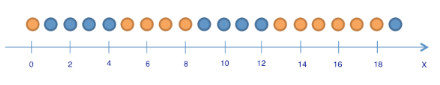

На рисунке 9 синих шариков и 11 жёлтых. Всего в совокупности $n_m=20$. Если мы наудачу вытащим шарик, то он с вероятностью $P_1=\frac{9}{20}$ будет синим и с вероятностью $P_2=\frac{11}{20}$ — жёлтым.

Значит, энтропия начального состояния: $H(Q) = -\sum_{i=1}^kP_i log_2P_i = -(\frac{9}{20}log_2\frac{9}{20} + \frac{11}{20}log_2\frac{11}{20}) = 1$

Энтропия не равна 0, а значит нужно попробовать ввести условие (предикат) , чтобы разделить выборку на две части.

Полным перебором выбираем значение порога  от 0 до 19. Для примера рассмотрим случай, когда $t=12$. То есть мы рассматриваем предикат $B_v(t=12) = I[x<=12]$.

Посмотрим, как изменится энтропия, если разбить шарики на две группы — с координатой меньше либо равной 12 и больше 12.

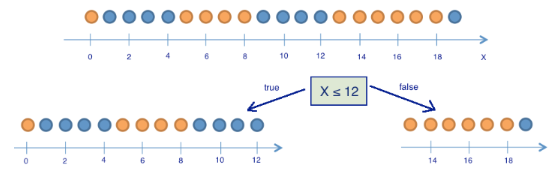

В левой группе оказалось $n_m^{left}=13$ шаров, из которых 8 синих и 5 жёлтых. Энтропия этой группы равна:
$$
\begin{aligned}
H(Q_{left}) = -\sum_{i=1}^2P_i log_2P_i = -(\frac{8}{13}log_2\frac{8}{13} + \frac{5}{13}log_2\frac{5}{13}) = 0.96
\end{aligned}
$$

В правой группе оказалось $n_m^{right}=7$ шаров, из которых 1 синий и 6 жёлтых. Энтропия правой группы равна:
$$
\begin{aligned}
H(Q_{right}) = -\sum_{i=1}^2P_i log_2P_i = -(\frac{1}{7}log_2\frac{1}{7} + \frac{6}{7}log_2\frac{6}{7}) = 0.6
\end{aligned}
$$

Получается, разделив шарики на две группы по признаку «координата меньше либо равна 12», мы уже получили более упорядоченную систему, чем вначале.

Функция ошибки (суммарная неопределённость в вершине) при этом равна:
$$
\begin{aligned}
L(j=1,t=12) = \cfrac{n_v^{left}}{n_v} H(Q_{left}) + \cfrac{n_v^{right}}{n_v} H(Q_{right}) = \frac{13}{20} * 0.96 + \frac{7}{20} * 0.6 = 0.834
\end{aligned}
$$

Такие вычисления мы должны произвести для всех возможных значений $t$, а если признаков не один, а несколько, то ещё и для всех признаков. После этого выбирается такая комбинация $(j,t)$, при которых значение $L(j,t)$ наименьшее. Затем, выбрав предикат, мы можем перейти к построению следующей вершины.

Продолжим деление шариков на группы до тех пор, пока в каждой группе шарики не будут одного цвета.

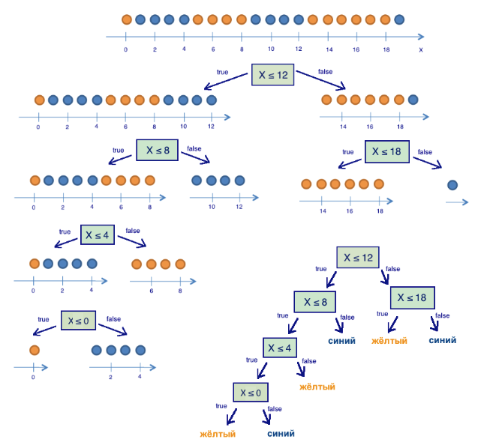


### Достоинства и недостатки

**Достоинства**:
* Дерево решений не требует нормализации/стандартизации данных;
* Наличие пропусков не оказывает существенного влияния на построение дерева;
* За счёт своей простоты модель деревьев решений интуитивно понятна и легко объяснима даже людям, не разбирающимся в методе;
* Приятный побочный эффект построения дерева решений — получение значимости признаков. Однако коэффициенты значимости целиком и полностью зависят от сложности дерева;

**Недостатки**:
* В силу дискретной топологической структуры дерево не дифференцируется по параметрам: стандартные алгоритмы поиска параметров, такие как градиентный спуск, не работают. Приходится использовать полный перебор;
* Так как метод является жадным, он долго обучается из-за полного перебора. Требует затрат больших вычислительных мощностей (по сравнению с другими алгоритмами). Особенно это ощутимо при большом количестве признаков на глубоких деревьях;
* Очень сильная склонность к переобучению. Необходим подбор внешних параметров: max_depth, min_sample_leaf и другие;
* Небольшое изменение в данных может заметно повлиять на структуру дерева.
* При работе с непрерывными числовыми признаками дерево делит их на категории и теряет информацию. Лучше всего дерево работает, если перевести числовые признаки в категориальные.

### [Практика](./tasks/diabet_decision_trees.ipynb)